In [2]:
#imports
import numpy as np
import pandas as pd

import sklearn.mixture as sm
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium

Text(0.5, 1.0, 'GMM')

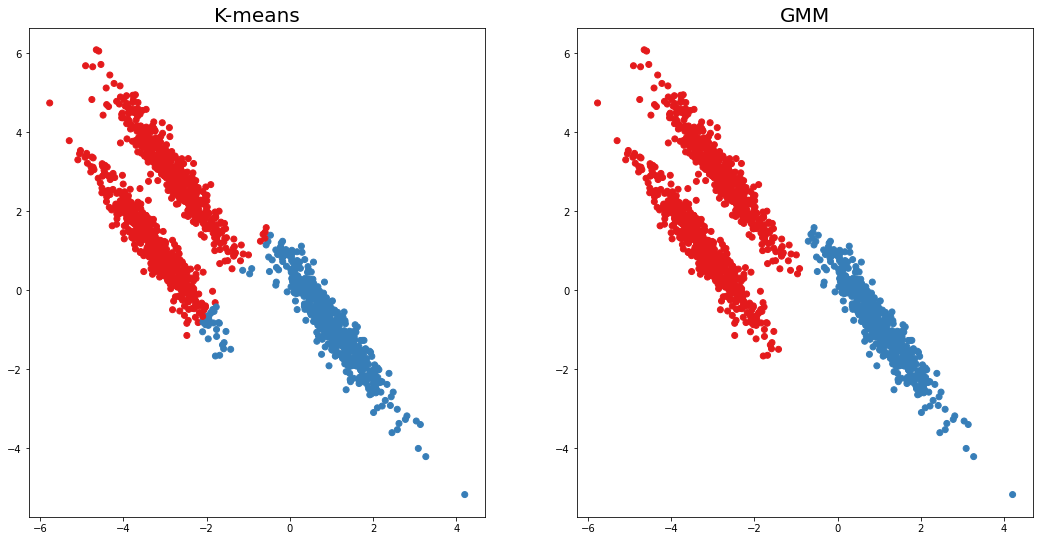

In [13]:
#Non spherical clusters 
plt.figure(figsize=(18, 9))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

#K-means
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_aniso)

plt.subplot(121)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred,cmap='Set1',vmin=0, vmax=7)
plt.title("K-means",size=20)

#GMM
gmm = sm.GaussianMixture(n_components=2, random_state=11,n_init=5)
y_pred = gmm.fit(X_aniso).predict(X_aniso)

plt.subplot(122)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred,cmap='Set1',vmin=0, vmax=7)
plt.title("GMM",size=20)

#plt.savefig('../figures/gmm_comp1.png',format='png')

In [17]:
gmm = sm.GaussianMixture(n_components=5, random_state=11,n_init=5)
y_pred = gmm.fit(X_aniso).predict(X_aniso)
gmm.bic(X_aniso)

7800.9342527972

In [21]:
bic = []
for i in range(1, 10):
    gmm = sm.GaussianMixture(n_components=i, random_state=11,n_init=5)
    y_pred = gmm.fit(X_aniso).predict(X_aniso)
    print("BIC -> ", gmm.bic(X_aniso), "Componentes ->", i)
    bic.append(gmm.bic(X_aniso))

BIC ->  10844.04324640895 Componentes -> 1
BIC ->  8963.849921038924 Componentes -> 2
BIC ->  7726.954900725774 Componentes -> 3
BIC ->  7767.136532859197 Componentes -> 4
BIC ->  7800.9342527972 Componentes -> 5
BIC ->  7840.170827478094 Componentes -> 6
BIC ->  7880.953214641946 Componentes -> 7
BIC ->  7916.187527924012 Componentes -> 8
BIC ->  7955.695377660117 Componentes -> 9


In [22]:
np.unique(y)

array([0, 1, 2])

In [71]:
data = pd.read_csv('https://raw.githubusercontent.com/ajpelaezr/datos_gmm/master/consolidado%20delitos.csv', sep = ";")

In [72]:
data.info() # Tarea 1: hace análisis descriptivo de datos -> pandas profiler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 49 columns):
OBJECTID               1350 non-null int64
Join_Count             1350 non-null int64
TARGET_FID             1350 non-null int64
CODIGO                 1350 non-null object
NOMBRE                 1350 non-null object
IDENTIFICA             1350 non-null object
SHAPE_Leng             1350 non-null float64
fecha_hecho            1067 non-null object
año                    1336 non-null float64
mes                    1336 non-null float64
dia                    1336 non-null float64
hora                   1336 non-null object
dia_semana             0 non-null float64
cantidad               1336 non-null float64
latitud                1336 non-null float64
longitud               1336 non-null float64
sexo                   908 non-null object
edad                   1336 non-null float64
estado_civil           558 non-null object
grupo_actor            259 non-null object
actividad_del

In [73]:
data.columns

Index(['OBJECTID', 'Join_Count', 'TARGET_FID', 'CODIGO', 'NOMBRE',
       'IDENTIFICA', 'SHAPE_Leng', 'fecha_hecho', 'año', 'mes', 'dia', 'hora',
       'dia_semana', 'cantidad', 'latitud', 'longitud', 'sexo', 'edad',
       'estado_civil', 'grupo_actor', 'actividad_delictiva', 'parentesco',
       'ocupacion', 'discapacidad', 'grupo_especial', 'medio_transporte',
       'nivel_academico', 'testigo', 'conducta', 'modalidad',
       'caracterizacion', 'conducta_especial', 'arma_medio', 'articulo_penal',
       'categoria_penal', 'nombre_barrio', 'codigo_barrio', 'codigo_comuna',
       'lugar', 'sede_receptora', 'bien', 'categoria_bien', 'grupo_bien',
       'modelo', 'color', 'permiso', 'unidad_medida', 'Shape_Length',
       'Shape_Area'],
      dtype='object')

In [35]:
data[['CODIGO', 'IDENTIFICA', 'fecha_hecho', 'hora', 'mes', 'dia']].head()

,CODIGO,IDENTIFICA,fecha_hecho,hora,mes,dia
0,1019,1019,01apr2005 16:30:00,30dec1899 16:30:00,4.0,1.0
1,1007,1007,22aug2011 09:59:59,30dec1899 10:00:00,8.0,22.0
2,511,511,30/11/2012 15:59,30dec1899 16:00:00,11.0,30.0
3,1310,1310,03/03/2006 15:00,30dec1899 15:00:00,3.0,3.0
4,1309,1309,10/07/2009 18:00,30dec1899 18:00:00,7.0,10.0


In [74]:
data.drop(['OBJECTID', 'IDENTIFICA', 'CODIGO', 'SHAPE_Leng', 'fecha_hecho', 'hora', 'mes', 'dia','dia_semana', 'cantidad','sexo', 'edad','estado_civil', 'grupo_actor', 'actividad_delictiva', 'parentesco','ocupacion', 'discapacidad', 'grupo_especial', 'medio_transporte', 'nivel_academico', 'testigo',  'modalidad',   'caracterizacion', 'conducta_especial', 'arma_medio', 'articulo_penal','categoria_penal', 'nombre_barrio', 'codigo_barrio', 'codigo_comuna','lugar', 'sede_receptora', 'bien', 'categoria_bien', 'grupo_bien','modelo', 'color', 'permiso', 'unidad_medida', 'Shape_Length','Shape_Area'], axis = 1, inplace = True)

In [75]:
data.head()

,Join_Count,TARGET_FID,NOMBRE,año,latitud,longitud,conducta
0,99,230,La Candelaria,2005.0,6.253360,-75.569276,Extorsion
1,60,187,Guayaquil,2011.0,6.246647,-75.570799,Extorsion
2,45,256,Castilla,2012.0,6.289003,-75.574418,Extorsion
3,41,130,Veinte de Julio,2006.0,6.253792,-75.617079,Extorsion
4,39,254,San Javier No.1,2009.0,6.255747,-75.614224,Extorsion


In [76]:
data.dropna(inplace = True)

In [84]:
data[data.isna() == False]

,Join_Count,TARGET_FID,NOMBRE,año,latitud,longitud,conducta
0,99,230,La Candelaria,2005.0,6.253360,-75.569276,Extorsion
1,60,187,Guayaquil,2011.0,6.246647,-75.570799,Extorsion
2,45,256,Castilla,2012.0,6.289003,-75.574418,Extorsion
3,41,130,Veinte de Julio,2006.0,6.253792,-75.617079,Extorsion
4,39,254,San Javier No.1,2009.0,6.255747,-75.614224,Extorsion
5,35,25,Corazón de Jesús,2012.0,6.247732,-75.577710,Extorsion
6,33,45,Prado,2009.0,6.257370,-75.564105,Extorsion
7,30,99,Belén,2007.0,6.232926,-75.596808,Extorsion
8,30,126,San Benito,2012.0,6.252613,-75.573852,Extorsion
9,30,136,Laureles,2007.0,6.247282,-75.597398,Extorsion


In [85]:
X_aniso, data.values

(array([[-3.42469421,  3.85671453],
        [-3.67055002,  4.01922664],
        [-3.50898194,  0.4650364 ],
        ...,
        [ 1.19904289, -1.64021208],
        [-0.5066595 ,  0.83268121],
        [ 1.14662393, -1.19941757]]),
 array([[99, 230, 'La Candelaria', ..., 6.25336, -75.569276, 'Extorsion'],
        [60, 187, 'Guayaquil', ..., 6.246647, -75.570799, 'Extorsion'],
        [45, 256, 'Castilla', ..., 6.289003, -75.57441800000001,
         'Extorsion'],
        ...,
        [61, 267, 'Campo Alegre', ..., 6.25191, -75.618,
         'Incautacion mercancia'],
        [139, 268, 'Altavista', ..., 6.225709999999999, -75.6058,
         'Incautacion mercancia'],
        [219, 269, 'Guayabal', ..., 6.19458, -75.59100000000001,
         'Incautacion mercancia']], dtype=object))

In [86]:
data.conducta.unique().astype(str)

array(['Extorsion', 'Homicidio', 'Hurto a entidad financiera',
       'Hurto por pirateria terrestre', 'Hurto de semoviente',
       'Hurto a residencia', 'Hurto a establecimiento comercial',
       'Incautacion mercancia'], dtype='<U33')

In [99]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn import preprocessing
Encoder_conducta = preprocessing.LabelEncoder()
Encoder_conducta.fit(data.conducta.unique().astype(str))

LabelEncoder()

In [100]:
#le.transform(data.conducta).shape, data.shape
data = pd.concat([data, pd.Series(Encoder_conducta.transform(data.conducta))], axis = 1).dropna()

In [101]:
Encoder_Nombre = preprocessing.LabelEncoder()
Encoder_Nombre.fit(data.NOMBRE.unique().astype(str))

LabelEncoder()

In [102]:
data = pd.concat([data, pd.Series(Encoder_Nombre.transform(data.NOMBRE))], axis = 1).dropna()

In [103]:
data.head()

,Join_Count,TARGET_FID,NOMBRE,año,latitud,longitud,conducta,0,0
0,99.0,230.0,La Candelaria,2005.0,6.253360,-75.569276,Extorsion,0.0,118.0
1,60.0,187.0,Guayaquil,2011.0,6.246647,-75.570799,Extorsion,0.0,105.0
2,45.0,256.0,Castilla,2012.0,6.289003,-75.574418,Extorsion,0.0,50.0
3,41.0,130.0,Veinte de Julio,2006.0,6.253792,-75.617079,Extorsion,0.0,255.0
4,39.0,254.0,San Javier No.1,2009.0,6.255747,-75.614224,Extorsion,0.0,218.0


In [105]:
data.shape

(1308, 9)

In [108]:
data.drop(['NOMBRE', 'conducta'], inplace = True, axis = 1)

In [109]:
data.head()

,Join_Count,TARGET_FID,año,latitud,longitud,0,0
0,99.0,230.0,2005.0,6.253360,-75.569276,0.0,118.0
1,60.0,187.0,2011.0,6.246647,-75.570799,0.0,105.0
2,45.0,256.0,2012.0,6.289003,-75.574418,0.0,50.0
3,41.0,130.0,2006.0,6.253792,-75.617079,0.0,255.0
4,39.0,254.0,2009.0,6.255747,-75.614224,0.0,218.0


In [111]:
for i in range(1, 10):
    gmm = sm.GaussianMixture(n_components=i)
    gmm.fit(data.values)
    print("BIC -> ", gmm.bic(data.values), "Componentes ->", i)

BIC ->  54485.453615517516 Componentes -> 1
BIC ->  49788.70837367294 Componentes -> 2
BIC ->  48153.03413880095 Componentes -> 3
BIC ->  48043.47522424622 Componentes -> 4
BIC ->  44305.724134148375 Componentes -> 5
BIC ->  44059.05272341493 Componentes -> 6
BIC ->  34660.164755133635 Componentes -> 7
BIC ->  44521.18644922962 Componentes -> 8
BIC ->  34959.60334932801 Componentes -> 9


Text(0.5, 1.0, 'GMM')

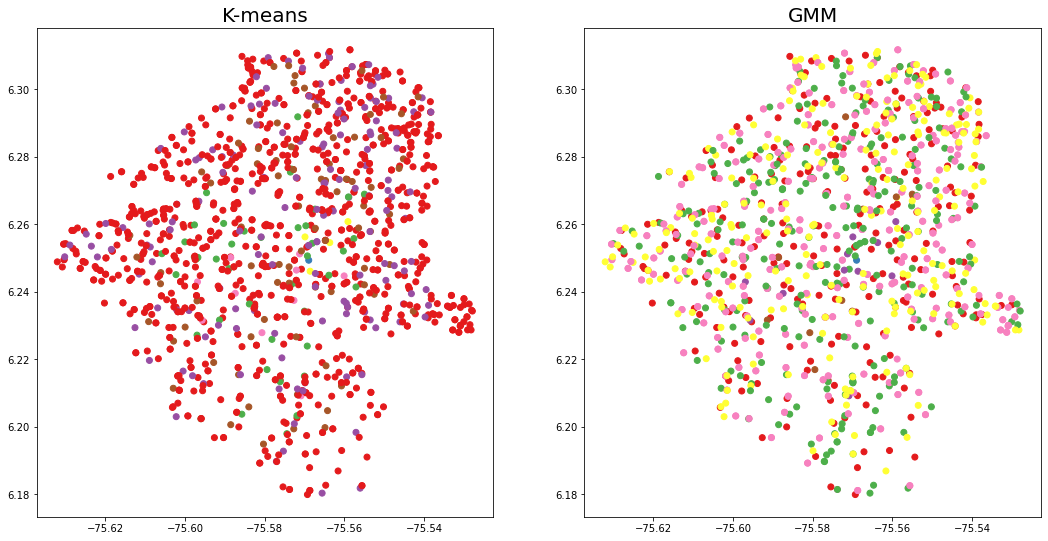

In [113]:
plt.figure(figsize=(18, 9))

#K-means
y_pred = KMeans(n_clusters=7, random_state=18).fit_predict(data.values)

plt.subplot(121)
plt.scatter(data.values[:, 4], data.values[:, 3], c=y_pred, cmap='Set1',vmin=0, vmax=7)
plt.title("K-means",size=20)

#GMM
gmm = sm.GaussianMixture(n_components=7, random_state=18,n_init=5)
y_pred = gmm.fit(data.values).predict(data.values)

plt.subplot(122)
plt.scatter(data.values[:, 4], data.values[:, 3], c=y_pred,cmap='Set1',vmin=0, vmax=7)
plt.title("GMM",size=20)

In [120]:
import folium

#Get gmm predictions
x = data[['longitud','latitud']].values
gmm = sm.GaussianMixture(n_components=7, random_state=18,n_init=5)
labels = gmm.fit(x).predict(x)

#create folium map 
m = folium.Map(
    location=[6.25336, -75.569276],
    zoom_start=12,
    tiles='Stamen Terrain'
)

colour = ['#f54242','#4287f5','#f59942','#f5f242','#69f542','#b342f5', '#967F18', '#DA33FF']

#add markers to map 
for i in range(len(x)):
    lon = x[i][0]
    lat = x[i][1]
    label = labels[i]
    
    #assign colour based on label 
    c = colour[label]
    
    #add marker
    folium.CircleMarker(location=[lat,lon],
                        radius=2,
                        color=c,
                        fill_color=c).add_to(m) 

#m.save('../figures/map.html')
#display map
m

In [121]:
import sklearn.mixture as sm
import matplotlib.pyplot as plt
%matplotlib inline

def plot_gmm(n):
    """
    Train a GMM using n clusters and plot the results
    
    Parameters
    ----------
    n : int
        Number of clusters
    """
    
    #Fit gmm and get labels
    x = data[['longitud','latitud']].values
    gmm = sm.GaussianMixture(n_components=n, random_state=11,n_init=5)
    labels = gmm.fit(x).predict(x)
    
    #assign a colour to each label
    colour = ['#f54242','#4287f5','#f59942','#f5f242','#69f542','#b342f5', '#967F18', '#DA33FF']
    c = [colour[l] for l in labels]
    
    #scatter plot
    plt.figure(figsize=(20, 12))
    plt.scatter(x=x[:, 0], y=x[:, 1], c=c, s=40, cmap='Set1', zorder=1)
    plt.title('Number of Clusters: {}'.format(n),size=30)
    plt.xlabel('Longitude',size=30)
    plt.ylabel('Latitude',size=30)
    
    #plt.savefig('../figures/gmm_{}.png'.format(n),format='png')

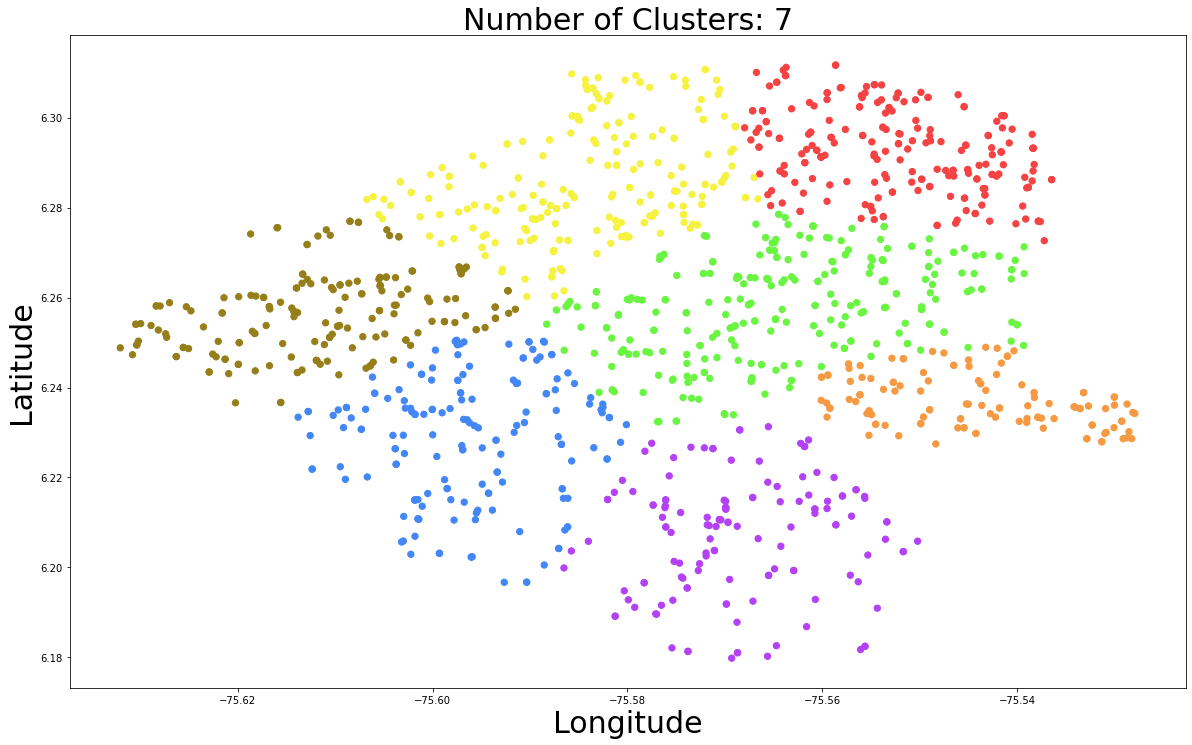

In [122]:
plot_gmm(7)

In [123]:
gmm = sm.GaussianMixture(n_components=7, random_state=18, n_init=5)
y_pred = gmm.fit(data.values).predict(data.values)

In [125]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [130]:
data_final = pd.concat([data, pd.Series(y_pred)], axis = 1).dropna()

In [131]:
data.head()

,Join_Count,TARGET_FID,año,latitud,longitud,0,0
0,99.0,230.0,2005.0,6.253360,-75.569276,0.0,118.0
1,60.0,187.0,2011.0,6.246647,-75.570799,0.0,105.0
2,45.0,256.0,2012.0,6.289003,-75.574418,0.0,50.0
3,41.0,130.0,2006.0,6.253792,-75.617079,0.0,255.0
4,39.0,254.0,2009.0,6.255747,-75.614224,0.0,218.0


In [132]:
data_final.head()

,Join_Count,TARGET_FID,año,latitud,longitud,0,0,0
0,99.0,230.0,2005.0,6.253360,-75.569276,0.0,118.0,2.0
1,60.0,187.0,2011.0,6.246647,-75.570799,0.0,105.0,2.0
2,45.0,256.0,2012.0,6.289003,-75.574418,0.0,50.0,0.0
3,41.0,130.0,2006.0,6.253792,-75.617079,0.0,255.0,0.0
4,39.0,254.0,2009.0,6.255747,-75.614224,0.0,218.0,0.0
